<a href="https://colab.research.google.com/github/Magicfenixx/BachelorsThesisAI/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install visualkeras
!pip install optuna
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
t

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import os
import tensorflow as tf
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.optimizers import RMSprop,AdamW
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# SPLIT THE SCENE

In [ ]:
# Import
from PIL import Image
import os
import shutil
from google.colab import files

# input and output folder paths
input_folder = '/content/input_images'
output_folder = '/content/output_images'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to split an image into 80x80 fragments
def split_image(image_path, output_folder, size=(80, 80)):
    img = Image.open(image_path)  # Open the image
    img_width, img_height = img.size  # Get image dimensions
    img_name = os.path.basename(image_path).split('.')[0]  # Get the image name

    # Iterate through the image and crop it into 80x80 tiles
    for i in range(0, img_width, size[0]):
        for j in range(0, img_height, size[1]):
            # Define the cropping box (left, upper, right, lower)
            box = (i, j, i + size[0], j + size[1])
            cropped_img = img.crop(box)  # Crop the image

            # Save each tile with a unique name
            cropped_img.save(os.path.join(output_folder, f'{img_name}_{i}_{j}.png'))

# Loop through each image and split
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        split_image(image_path, output_folder)

print('Images have been successfully split and saved!')

output_folder = '/content/train/no_ships' # Path to the output folder
shutil.make_archive('/content/output_images_zip', 'zip', output_folder) # Create a zip file of the output folder
files.download('/content/output_images_zip.zip') # Download the zip file

FileNotFoundError: [Errno 2] No such file or directory: '/content/input_images'

# DOWNLOAD OF SECTORS

In [ ]:
import shutil
from google.colab import files

# Path to the output folder
output_folder = '/content/train/no_ships'

# Create a zip file of the output folder
shutil.make_archive('/content/output_images_zip', 'zip', output_folder)

# Download the zip file
files.download('/content/output_images_zip.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# REVIEW OF DATA

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the folder containing 80x80 images
fragments_folder = '/content/train/no_ships'  # Replace with your folder containing the 80x80 fragments

# List all the images in the fragments folder
fragment_files = [f for f in os.listdir(fragments_folder) if f.endswith('.png') or f.endswith('.jpg')]

# Check if there are any fragments available
if not fragment_files:
    print('No fragments found in the folder!')
else:
    # Select a random image from the folder
    random_fragment = random.choice(fragment_files)

    # Open the image
    fragment_path = os.path.join(fragments_folder, random_fragment)
    img = Image.open(fragment_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

    print(f'Displaying: {random_fragment}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/train/no_ships'

# LABELING INITIAL DATA

In [ ]:
import os
import csv

ship_folder = '/content/drive/MyDrive/train/ships'
no_ship_folder = '/content/drive/MyDrive/train/no_ships'

# Output CSV file
output_csv = 'labeled_images.csv'

# Open CSV file for writing
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["filename", "label"])  # Header row

    # Label images in the ship folder (label = "1")
    for img_file in os.listdir(ship_folder):
        if img_file.endswith('.jpg') or img_file.endswith('.png'):
            writer.writerow([os.path.join('ships', img_file), "1"])

    # Label images in the no ship folder (label = "0")
    for img_file in os.listdir(no_ship_folder):
        if img_file.endswith('.jpg') or img_file.endswith('.png'):
            writer.writerow([os.path.join('no_ships', img_file), "0"])

print(f"Labels saved to {output_csv}")

Labels saved to labeled_images.csv


# UPDATING DICTIONARY OF LABELS

In [ ]:
import pandas as pd

df = pd.read_csv('/content/labeled_images.csv')

# Replace numerical labels with string labels
df['label'] = df['label'].replace({1: 'ship', 0: 'no_ship'})

# Save
df.to_csv('/content/labeled_images.csv', index=False)


# TRAIN/VALIDATION SPLIT

In [ ]:
from sklearn.model_selection import KFold

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Prepare cross-validation storage
fold_accuracies = []  # Store accuracies for each fold

df = pd.read_csv('/content/labeled_images.csv')  # Original data

In [ ]:
print(train_df.head())
print(val_df.head())

                   filename label
0  ships/aug_12_3573584.png  ship
2   ships/aug_0_3113002.png  ship
3  ships/aug_13_6558714.png  ship
5   ships/aug_9_9214834.png  ship
6  ships/aug_20_3389493.png  ship
                    filename label
1     ships/aug_2_354332.png  ship
4   ships/aug_14_2888318.png  ship
11  ships/aug_11_3464795.png  ship
16   ships/aug_6_1850788.png  ship
19   ships/aug_5_5586020.png  ship


# AUGMENTATION OF DATA SINCE THE AMOUNT OF SHIPS ARE SMALL ( OLD MODEL)

INITIALLIZING IMAGE GENERATOR

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
# def load_and_preprocess_image(file_path):
#     image_size = 80
#     image = tf.io.read_file(file_path)
#     image = tf.image.decode_png(image, channels=1)  # Grayscale, channels=1
#     image = tf.image.resize(image, [image_size, image_size])
#     image = image / 255.0  # Normalize to [0, 1]
#     return image

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     # rotation_range=0,      # Rotate images up to 30 degrees
#     # width_shift_range=0,  # Horizontal shift
#     # height_shift_range=0, # Vertical shift
#     # shear_range=0,        # Shear transformation
#     # zoom_range=0,         # Zoom in/out
#     horizontal_flip=True,   # Randomly flip images horizontally
#     vertical_flip=True,     # Randomly flip images vertically
#     #fill_mode='nearest',     # Filling pixels after transformation
#     rescale=1./255
# )


# # For validation/testing, don't use augmentations
# test_datagen = ImageDataGenerator(rescale=1./255)

Utilizing

In [ ]:
# import pandas as pd
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Load your training and testing CSV files
# train_df = pd.read_csv('/content/train_labels.csv')
# test_df = pd.read_csv('/content/test_labels.csv')

# # Path to your main directory where both 'ships' and 'no_ships' are located
# image_directory = '/content/drive/MyDrive/train/'  # Main directory

# # Training generator
# train_generator = datagen.flow_from_dataframe(
#     dataframe=train_df,
#     directory=image_directory,  # Main directory containing both 'ships' and 'no_ships'
#     x_col='filename',
#     y_col='label',
#     target_size=(80, 80),
#     batch_size=115,
#     class_mode='binary',
#     color_mode='grayscale'  # This ensures the images are read as grayscale
# )

# # Testing/validation generator
# test_generator = test_datagen.flow_from_dataframe(
#     dataframe=test_df,
#     directory=image_directory,  # Main directory for images
#     x_col='filename',
#     y_col='label',
#     target_size=(80, 80),
#     batch_size=115,
#     class_mode='binary',
#     color_mode='grayscale'  # This ensures the images are read as grayscale
# )

Found 1980 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.


# TRAINING PREREQUISITES

In [ ]:
""" Balance classes (Old Model) """

from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(train_df['label']),
                                                  y=train_df['label'])

class_weights_dict = {0: class_weights[0], 1: class_weights[1]}  # Map 0 for 'no_ship' and 1 for 'ship'

print("Class weights: ", class_weights_dict)

NameError: name 'train_df' is not defined

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


learning_rate_callback = ReduceLROnPlateau(
    monitor='val_accuracy',  # Track validation loss
    factor=0.50,          # Reduce learning rate by half when no improvement
    patience=3,          # Wait for 3 epochs of no improvement
    min_lr=1e-6,         #floor for the learning rate
    verbose=1            # Display updates in output
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',           # Monitor the validation loss
    patience=5,                   # Stop after 3 epochs with no improvement
    restore_best_weights=True     # Restore the model to the best weights
)

In [ ]:
""" Learning Rate Scheduler (Old model) """

import tensorflow as tf

def lr_schedule(epoch, lr):
    warmup_epochs = 3
    if epoch < warmup_epochs:
        # Linear warmup for the first few epochs
        return float(lr * (epoch + 1) / warmup_epochs)
    else:
        # Exponential decay after warmup
        return float(lr * tf.math.exp(-0.1 * (epoch - warmup_epochs)))

# Initialize learning rate scheduler callback
warmup_lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)

# KERAS MODEL INITIAL


In [ ]:
from tensorflow.keras import backend as K

# Clear previous models from memory
K.clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, AdamW
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision, Recall

# Initialize the model
Boat_Detection = Sequential()

# layers
Boat_Detection.add(Conv2D(32, (7,7), strides=(1, 1), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.015), input_shape=(80,80,1)))
Boat_Detection.add(BatchNormalization())


Boat_Detection.add(Conv2D(64, (5,5), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.015)))
Boat_Detection.add(Dropout(0.6))
Boat_Detection.add(BatchNormalization())
Boat_Detection.add(MaxPool2D((2,2), strides=2, padding='same'))

Boat_Detection.add(Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.02)))
Boat_Detection.add(Dropout(0.7))
Boat_Detection.add(BatchNormalization())
Boat_Detection.add(MaxPool2D((2,2), strides=2, padding='same'))

Boat_Detection.add(GlobalAveragePooling2D())
Boat_Detection.add(Dense(units=32, activation='relu',
                         kernel_regularizer=regularizers.l2(0.02)))
Boat_Detection.add(Dropout(0.8))
Boat_Detection.add(Dense(units=2, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score

# Add F1 score function to track it as well
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        return 2 * (precision_result * recall_result) / (precision_result + recall_result + tf.keras.backend.epsilon())

In [ ]:
Boat_Detection.compile(optimizer=AdamW(learning_rate=0.001,
                                       weight_decay=2e-5,
                                       clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), F1Score()])

In [ ]:
Boat_Detection.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 80, 80, 32)          │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 80, 80, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 40, 40, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 20, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,578 (361.63 KB)

 Trainable params: 92,258 (360.38 KB)

 Non-trainable params: 320 (1.25 KB)

Incorporating K-folds + TRAINING

In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

df = pd.read_csv('/content/labeled_images.csv')

# KFold setup
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

image_directory = '/content/drive/MyDrive/train/'  # Path to the root directory containing subdirectories

# ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    shear_range = 0.2,
    channel_shift_range = 20.0,
    brightness_range = [0.8, 1.2],
    rescale=1./255
)
test_datagen = ImageDataGenerator(rescale=1./255)

for fold, (train_idx, val_idx) in enumerate(kf.split(df)):
    print(f"Starting fold {fold + 1}/{k}...")

    # Train and validation splits
    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    train_df = train_df.reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)

    # Saving splits for debugging
    train_df.to_csv(f'/content/train_labels_fold{fold + 1}.csv', index=False)
    val_df.to_csv(f'/content/val_labels_fold{fold + 1}.csv', index=False)


    # Generators for the current fold
    train_generator = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=image_directory,  # Root directory
        x_col='filename',
        y_col='label',
        target_size=(80, 80),
        batch_size=100,
        class_mode='categorical',
        color_mode='grayscale'
    )

    val_generator = test_datagen.flow_from_dataframe(
        dataframe=val_df,
        directory=image_directory,  # Root directory
        x_col='filename',
        y_col='label',
        target_size=(80, 80),
        batch_size=100,
        class_mode='categorical',
        color_mode='grayscale'
    )

    print(f"Fold {fold + 1} - Generators ready!")

    history = Boat_Detection.fit(
        train_generator,
        validation_data=val_generator,
        callbacks=[learning_rate_callback],
        epochs=10
    )
    Boat_Detection.save(f"/content/fold_{fold+1}_model.h5")
    print(f"Fold {fold + 1} - Training completed!")

Starting fold 1/5...
Found 1980 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.
Fold 1 - Generators ready!
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 732ms/step - accuracy: 0.5880 - f1_score: 0.5846 - loss: 2.6270 - precision: 0.5865 - recall: 0.5827 - val_accuracy: 0.5354 - val_f1_score: 0.5354 - val_loss: 1.8457 - val_precision: 0.5354 - val_recall: 0.5354 - learning_rate: 0.0010
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.7796 - f1_score: 0.7796 - loss: 1.6400 - precision: 0.7796 - recall: 0.7796 - val_accuracy: 0.5030 - val_f1_score: 0.5030 - val_loss: 1.1545 - val_precision: 0.5030 - val_recall: 0.5030 - learning_rate: 0.0010
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.7753 - f1_score: 0.7753 - loss: 1.0270 - precision: 0.7753 - recall: 0.7753 - val_accuracy: 0.4808 - val_f1_score: 0.4808 - val_loss: 0.7593 - val_precision: 0.4808 - val_recall: 0.4808 - learning_rate: 0.0010


Fold 1 - Training completed!
Fold 1:
  Max index in val_idx: 2473
  Length of val_df: 495
Starting fold 2/5...
Found 1980 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.
Fold 2 - Generators ready!
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.9014 - f1_score: 0.9014 - loss: 0.2455 - precision: 0.9014 - recall: 0.9014 - val_accuracy: 0.5657 - val_f1_score: 0.5657 - val_loss: 0.2630 - val_precision: 0.5657 - val_recall: 0.5657 - learning_rate: 1.2500e-04
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.9197 - f1_score: 0.9197 - loss: 0.2349 - precision: 0.9197 - recall: 0.9197 - val_accuracy: 0.5737 - val_f1_score: 0.5737 - val_loss: 0.2540 - val_precision: 0.5737 - val_recall: 0.5737 - learning_rate: 1.2500e-04
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 370ms/step - accuracy: 0.9011 - f1_score: 0.9011 - loss: 0.2288 - precision: 0.9011 - recall: 0.9011 - val_accuracy: 0.4788 - val_f1_scor

Fold 2 - Training completed!
Fold 2:
  Max index in val_idx: 2474
  Length of val_df: 495
Starting fold 3/5...
Found 1980 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.
Fold 3 - Generators ready!
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.9243 - f1_score: 0.9243 - loss: 0.1860 - precision: 0.9243 - recall: 0.9243 - val_accuracy: 0.5232 - val_f1_score: 0.5232 - val_loss: 0.2111 - val_precision: 0.5232 - val_recall: 0.5232 - learning_rate: 3.1250e-05
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 329ms/step - accuracy: 0.9301 - f1_score: 0.9301 - loss: 0.1836 - precision: 0.9301 - recall: 0.9301 - val_accuracy: 0.5232 - val_f1_score: 0.5232 - val_loss: 0.2091 - val_precision: 0.5232 - val_recall: 0.5232 - learning_rate: 3.1250e-05
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 361ms/step - accuracy: 0.9321 - f1_score: 0.9321 - loss: 0.1820 - precision: 0.9321 - recall: 0.9321 - val_accuracy: 0.5232 - val_f1_scor

Fold 3 - Training completed!
Fold 3:
  Max index in val_idx: 2463
  Length of val_df: 495
Starting fold 4/5...
Found 1980 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.
Fold 4 - Generators ready!
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.9202 - f1_score: 0.9202 - loss: 0.1738 - precision: 0.9202 - recall: 0.9202 - val_accuracy: 0.4929 - val_f1_score: 0.4929 - val_loss: 0.2005 - val_precision: 0.4929 - val_recall: 0.4929 - learning_rate: 3.9063e-06
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.9343 - f1_score: 0.9343 - loss: 0.1730 - precision: 0.9343 - recall: 0.9343 - val_accuracy: 0.4929 - val_f1_score: 0.4929 - val_loss: 0.2001 - val_precision: 0.4929 - val_recall: 0.4929 - learning_rate: 3.9063e-06
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.9330 - f1_score: 0.9330 - loss: 0.1730 - precision: 0.9330 - recall: 0.9330 - val_accuracy: 0.4929 - val_f1_score

Fold 4 - Training completed!
Fold 4:
  Max index in val_idx: 2471
  Length of val_df: 495
Starting fold 5/5...
Found 1980 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.
Fold 5 - Generators ready!
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step - accuracy: 0.9223 - f1_score: 0.9223 - loss: 0.1724 - precision: 0.9223 - recall: 0.9223 - val_accuracy: 0.9414 - val_f1_score: 0.9414 - val_loss: 0.1951 - val_precision: 0.9414 - val_recall: 0.9414 - learning_rate: 1.9531e-06
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 378ms/step - accuracy: 0.9327 - f1_score: 0.9327 - loss: 0.1718 - precision: 0.9327 - recall: 0.9327 - val_accuracy: 0.9475 - val_f1_score: 0.9475 - val_loss: 0.1947 - val_precision: 0.9475 - val_recall: 0.9475 - learning_rate: 1.9531e-06
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms/step - accuracy: 0.9361 - f1_score: 0.9361 - loss: 0.1708 - precision: 0.9361 - recall: 0.9361 - val_accuracy: 0.9515 - val_f1_score

Fold 5 - Training completed!
Fold 5:
  Max index in val_idx: 2467
  Length of val_df: 495


Check for folds overlapping

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf.split(df)):
    train_filenames = set(df.iloc[train_idx]['filename'])
    val_filenames = set(df.iloc[val_idx]['filename'])

    # Check for overlap
    overlap = train_filenames.intersection(val_filenames)
    if overlap:
        print(f"Warning: The following files appear in both training and validation for fold {fold + 1}: {overlap}")
    else:
        print(f"Fold {fold + 1}: No overlap detected.")

Fold 1: No overlap detected.
Fold 2: No overlap detected.
Fold 3: No overlap detected.
Fold 4: No overlap detected.
Fold 5: No overlap detected.


In [ ]:
evaluation = Boat_Detection.evaluate(val_generator)

print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9808 - f1_score: 0.9808 - loss: 0.1917 - precision: 0.9808 - recall: 0.9808
Test Accuracy: 97.78%


In [ ]:
""" Old Model training """
# history = Boat_Detection.fit(
#     train_generator,  # The generator for the training set
#     class_weight=class_weights_dict,
#     validation_data=test_generator,  # The generator for the validation set
#     callbacks=[learning_rate_callback, warmup_lr_scheduler],
#     batch_size = 256,
#     epochs=10  # Or any number of epochs you choose
# )


Epoch 1: LearningRateScheduler setting learning rate to 0.00020000000949949026.
Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.9278 - loss: 0.2802 - val_accuracy: 0.5845 - val_loss: 1.6783 - learning_rate: 2.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 8.000000379979611e-05.
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 63s 720ms/step - accuracy: 0.9840 - loss: 0.0900 - val_accuracy: 0.5845 - val_loss: 2.2043 - learning_rate: 8.0000e-05

Epoch 3: LearningRateScheduler setting learning rate to 4.800000315299258e-05.
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 64s 730ms/step - accuracy: 0.9864 - loss: 0.0685 - val_accuracy: 0.5845 - val_loss: 2.4160 - learning_rate: 4.8000e-05

Epoch 4: LearningRateScheduler setting learning rate to 3.840000135824084e-05.
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.9867 - loss: 0.0580
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.920000067912042e-05.
86/86 ━━━━━━━━━━━━━━━━━━━━ 61s 703ms/step - accu

# PREDICTIONS VISUALIZATION

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step
Total mispredicted images: 238


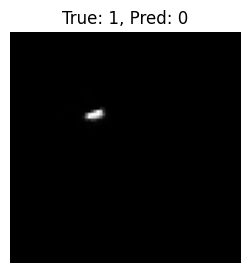

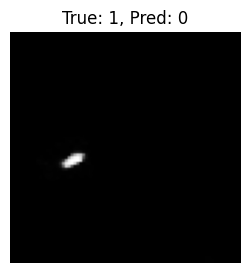

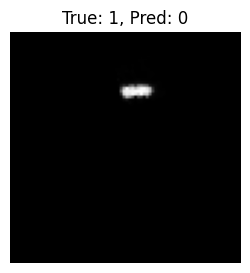

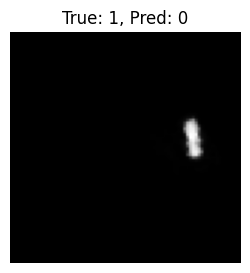

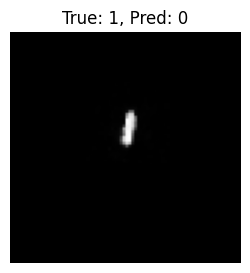

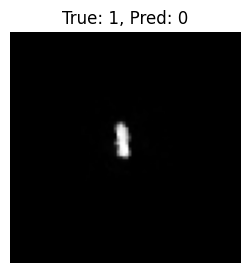

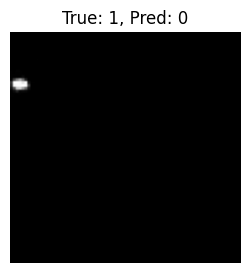

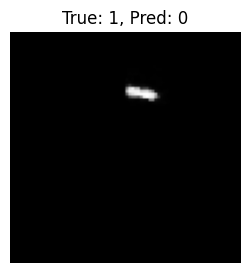

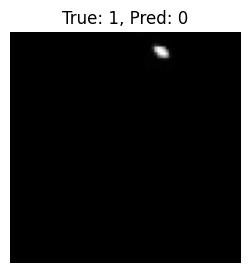

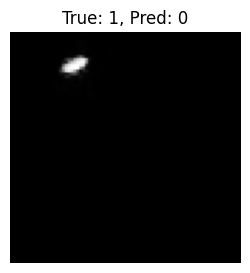

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on validation data (generated by val_generator)
val_preds = Boat_Detection.predict(val_generator, verbose=1)

# Get the true labels from the validation set
val_true_labels = val_df['label'].replace({'ship': 1, 'no_ship': 0}).values  # Ensure correct encoding

# Convert predictions to class labels
predicted_labels = np.argmax(val_preds, axis=-1)  # For multi-class (the predicted class index)

# Compare predicted labels with actual labels
mispredicted_indices = np.where(predicted_labels != val_true_labels)[0]

# Display mispredicted images
num_mispredicted = len(mispredicted_indices)
print(f"Total mispredicted images: {num_mispredicted}")

# Show mispredicted images
for i in range(min(num_mispredicted, 10)):  # Show at most 5 mispredicted images
    idx = mispredicted_indices[i]

    # Get the mispredicted image
    image_path = '/content/drive/MyDrive/train/' + val_df.iloc[idx]['filename']
    img = plt.imread(image_path)  # Assuming the path is correct and image is accessible

    # Display the image
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')  # Show the image (grayscale)
    true_label = val_true_labels[idx]
    pred_label = predicted_labels[idx]

    # Plot title showing the true and predicted labels
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
    plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step


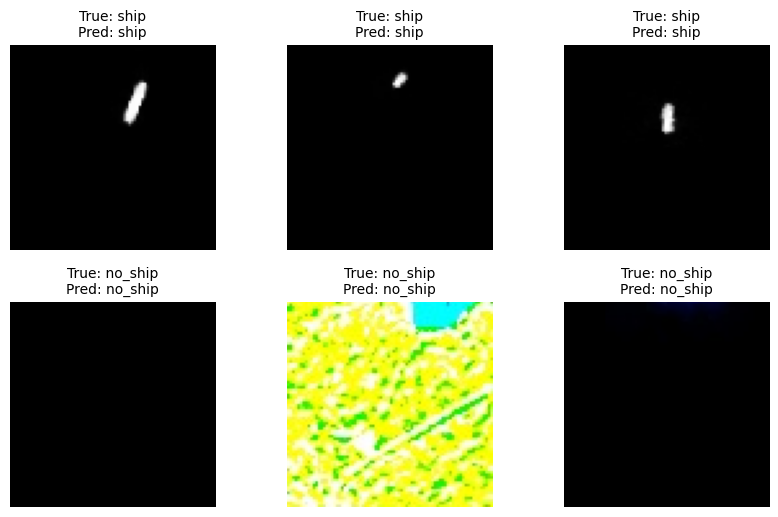

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Predict on validation data (generated by val_generator)
val_preds = Boat_Detection.predict(val_generator, verbose=1)

# Get the true labels from the validation set
class_mapping = {'ship': 1, 'no_ship': 0}  # Adjust according to your classes
val_true_labels = val_df['label'].replace(class_mapping).values

# Convert predictions to class labels
predicted_labels = np.argmax(val_preds, axis=-1)

# Identify correctly predicted indices for each class
correct_indices_ship = np.where((predicted_labels == val_true_labels) & (val_true_labels == class_mapping['ship']))[0]
correct_indices_no_ship = np.where((predicted_labels == val_true_labels) & (val_true_labels == class_mapping['no_ship']))[0]

# Sample images for visualization (up to a limit)
max_images_per_class = 3
correct_ship_sample = correct_indices_ship[:max_images_per_class]
correct_no_ship_sample = correct_indices_no_ship[:max_images_per_class]

# Combine samples
selected_indices = np.concatenate((correct_ship_sample, correct_no_ship_sample))

# Map numeric labels back to class names
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Define grid dimensions
grid_rows = 2  # Adjust rows as needed
grid_cols = max_images_per_class  # Set columns based on the sample size

# Initialize the plot
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(10, 6))
fig.subplots_adjust(hspace=0.25, wspace=0.25)

# Display images
for i, ax in enumerate(axes.flat):
    if i < len(selected_indices):
        idx = selected_indices[i]

        # Get the image path
        image_path = os.path.join('/content/drive/MyDrive/train/', val_df.iloc[idx]['filename'])

        # Check if the file exists
        if os.path.exists(image_path):
            img = plt.imread(image_path)  # Load the image

            # Get true and predicted labels
            true_label = inverse_class_mapping[val_true_labels[idx]]
            pred_label = inverse_class_mapping[predicted_labels[idx]]

            # Display the image
            ax.imshow(img, cmap='gray')  # Adjust colormap if necessary
            ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
            ax.axis('off')  # Hide axes
        else:
            ax.set_title("Image not found", fontsize=10)
            ax.axis('off')
    else:
        ax.axis('off')  # Hide unused axes

# Show the grid
plt.show()

In [ ]:
""" Old version of prediction visualization """

def predict_and_plot(image_path, model, tile_size, scale_factor=1):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Optionally resize the image (for better visualization)
    if scale_factor > 1:
        image = resize_image(image, scale_factor)

    # Split the image into tiles
    tiles, positions = split_image_into_tiles(image, tile_size)

    # Preprocess the tiles
    preprocessed_tiles = preprocess_tiles(tiles)

    # Generate predictions
    predictions = model.predict(preprocessed_tiles)
    predicted_labels = np.argmax(predictions, axis=1)  # Convert to class indices

    # Map class indices to labels
    class_labels = {0: 'no_ship', 1: 'ship'}
    predicted_labels = [class_labels[label] for label in predicted_labels]

    # Adjust number of rows and columns for better visualization
    num_rows = len(tiles) // 5 + (1 if len(tiles) % 5 != 0 else 0)  # 5 tiles per row
    num_cols = min(len(tiles), 5)  # Max 5 tiles in one row

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Adjust figure size dynamically
    axes = axes.flatten()
    for idx, (tile, label) in enumerate(zip(tiles, predicted_labels)):
        ax = axes[idx]
        ax.imshow(tile, cmap='gray')
        ax.axis('off')
        ax.set_title(label, fontsize=12)

    # Hide any unused subplot axes
    for ax in axes[len(tiles):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()
uploaded_images = [os.path.join(upload_directory, img) for img in os.listdir(upload_directory) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
for image_path in uploaded_images:
    predict_and_plot(image_path, model, tile_size)

Number of full tiles: 465
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step


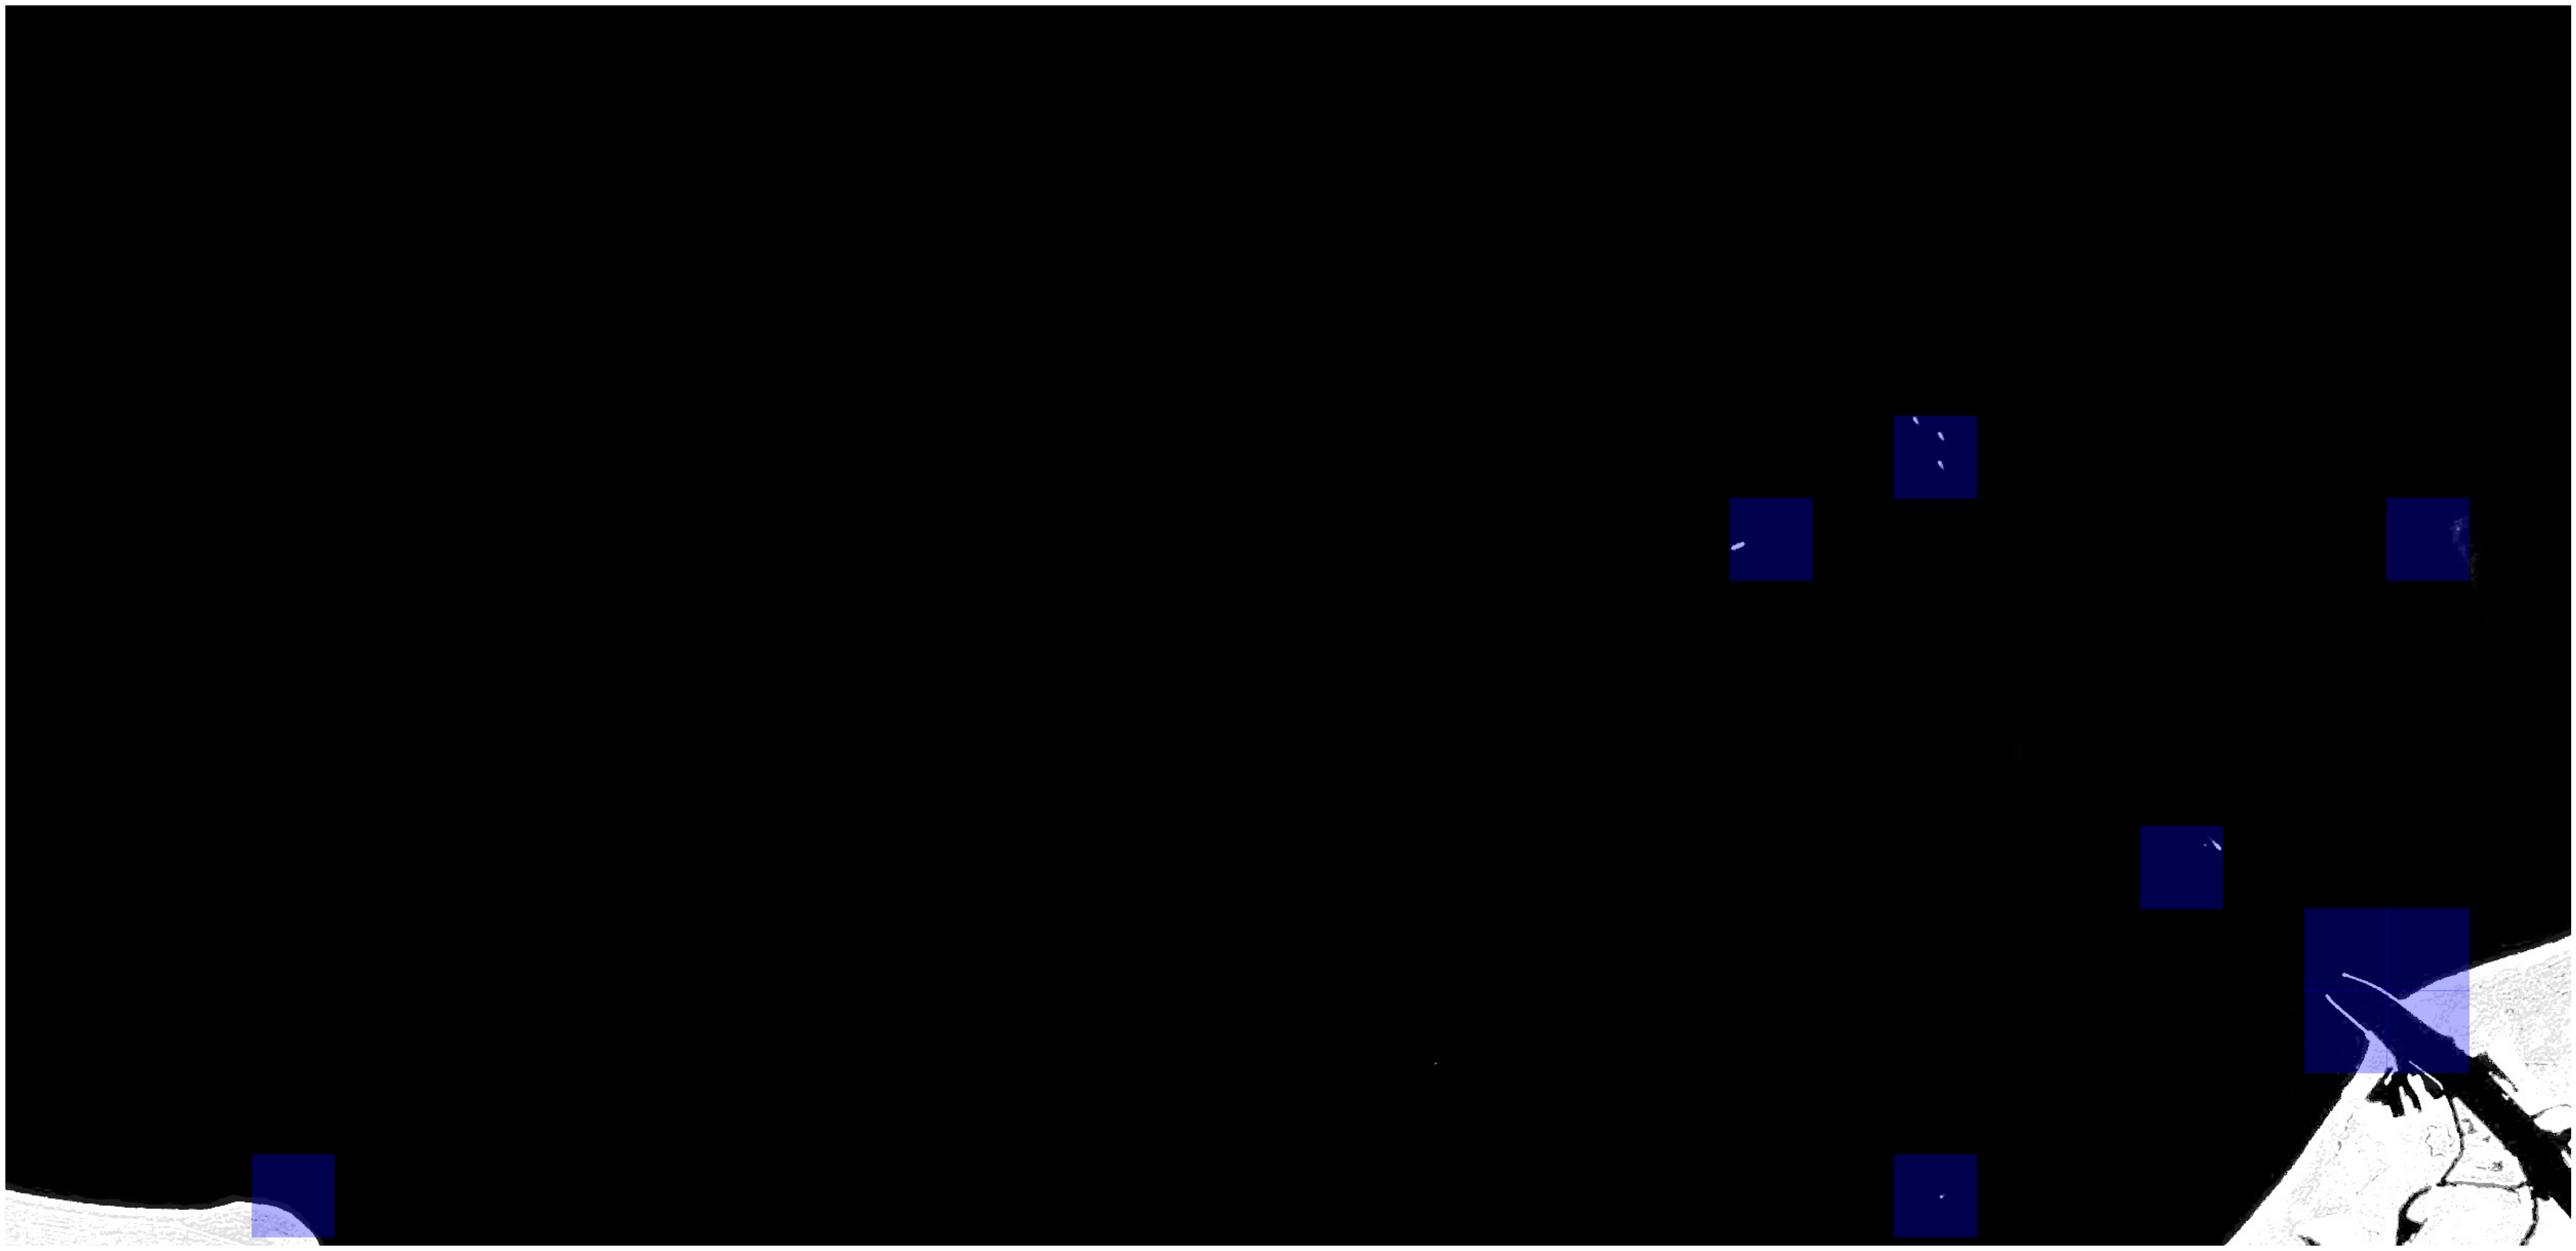

In [ ]:
import os
import numpy as np
import cv2
import math
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Paths
model_path = '/content/fold_5_model.h5'
upload_directory = '/content/1/'
model = load_model(model_path)

tile_size = 80

def count_full_tiles(image, tile_size):
    h, w = image.shape  # Get image height and width
    num_tiles_y = h // tile_size  # Full tiles along height
    num_tiles_x = w // tile_size  # Full tiles along width
    return num_tiles_y * num_tiles_x  # Total number of full tiles

def split_image_into_tiles_exclude_borders(image, tile_size):
    tiles = []
    positions = []
    h, w = image.shape

    num_tiles_y = h // tile_size
    num_tiles_x = w // tile_size

    for y in range(num_tiles_y):
        for x in range(num_tiles_x):
            start_y = y * tile_size
            start_x = x * tile_size
            tile = image[start_y:start_y+tile_size, start_x:start_x+tile_size]
            tiles.append(tile)
            positions.append((start_x, start_y))

    return np.array(tiles), positions

def preprocess_tiles(tiles):
    # normalize pixel values
    tiles = np.array(tiles).astype('float32') / 255.0
    return np.expand_dims(tiles, axis=-1)  # channel dimension

def predict_and_overlay_exclude_borders(image_path, model, tile_size):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    full_tile_count = count_full_tiles(image, tile_size)
    print(f"Number of full tiles: {full_tile_count}")


    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR

    tiles, positions = split_image_into_tiles_exclude_borders(image, tile_size)
    preprocessed_tiles = preprocess_tiles(tiles)

    predictions = model.predict(preprocessed_tiles)
    predicted_labels = np.argmax(predictions, axis=1)

    # Determine grid size
    original_height, original_width = image.shape
    num_rows = original_height // tile_size
    num_cols = original_width // tile_size

    for idx, (label, pos) in enumerate(zip(predicted_labels, positions)):
        if label == 1:  # 'ship' label
            x, y = pos
            overlay = color_image.copy()
            cv2.rectangle(overlay, (x, y), (x + tile_size, y + tile_size), (255, 0, 0), -1)  # Blue rectangle
            alpha = 0.3
            cv2.addWeighted(overlay, alpha, color_image, 1 - alpha, 0, color_image)  # Blend overlay

    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
    plt.axis('off')
    plt.show()

uploaded_images = [os.path.join(upload_directory, img) for img in os.listdir(upload_directory) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
for image_path in uploaded_images:
    predict_and_overlay_exclude_borders(image_path, model, tile_size)


In [ ]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

num_full_tiles = count_full_tiles(image, tile_size)
print(f"Number of full tiles: {num_full_tiles}")

# Hard coded

num_mispredicted = 7

TP=3
FP=7
FN=0


pred_accuracy=(num_full_tiles-num_mispredicted)/num_full_tiles
print(f"Prediction Accuracy: {pred_accuracy}")

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")

Number of full tiles: 465
Prediction Accuracy: 0.9849462365591398
Precision: 0.3
Recall: 1.0
F1-score: 0.4615384615384615


# Predictions review

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step
Total mispredicted images: 250


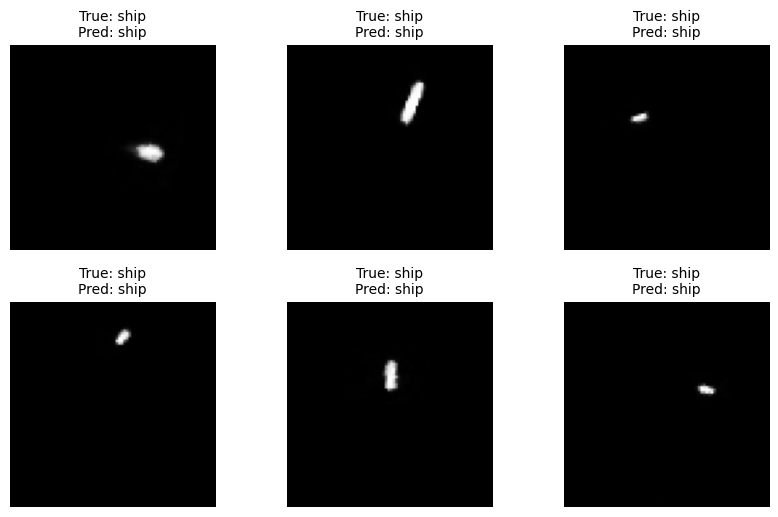

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Predict on validation data (generated by val_generator)
val_preds = Boat_Detection.predict(val_generator, verbose=1)

# Get the true labels from the validation set
class_mapping = {'ship': 1, 'no_ship': 0}  # Adjust according to your classes
val_true_labels = val_df['label'].replace(class_mapping).values

# Convert predictions to class labels
predicted_labels = np.argmax(val_preds, axis=-1)

# Identify mispredicted indices
mispredicted_indices = np.where(predicted_labels == val_true_labels)[0]

# Display number of mispredicted images
num_mispredicted = len(mispredicted_indices)
print(f"Total mispredicted images: {num_mispredicted}")

# Map numeric labels back to class names
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Define grid dimensions
grid_rows = 2  # Number of rows in the grid
grid_cols = 3  # Number of columns in the grid
max_images = grid_rows * grid_cols

# Initialize the plot
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(10, 6))
fig.subplots_adjust(hspace=0.25, wspace=0.25)

# Display mispredicted images
for i, ax in enumerate(axes.flat):
    if i < len(mispredicted_indices):
        idx = mispredicted_indices[i]

        # Get the mispredicted image path
        image_path = os.path.join('/content/drive/MyDrive/train/', val_df.iloc[idx]['filename'])

        # Check if the file exists to avoid errors
        if os.path.exists(image_path):
            img = plt.imread(image_path)  # Load the image

            # Get true and predicted labels
            true_label = inverse_class_mapping[val_true_labels[idx]]
            pred_label = inverse_class_mapping[predicted_labels[idx]]

            # Display the image
            ax.imshow(img, cmap='gray')  # Adjust colormap if needed
            ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
            ax.axis('off')  # Hide axes
        else:
            ax.set_title("Image not found", fontsize=10)
            ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide unused axes

# Show the grid
plt.show()

#KERAS TUNER Tuning single hyperparameters 1 by 1

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
# Load labeled data from CSV
df = pd.read_csv('/content/labeled_images.csv')

# Split the dataset (80% train, 20% test)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv('/content/train_labels.csv', index=False)
val_df.to_csv('/content/val_labels.csv', index=False)

Dropout 1 tuning

Trial 5 Complete [00h 59m 58s]
val_accuracy: 0.5555555820465088

Best val_accuracy So Far: 0.903030276298523
Total elapsed time: 05h 00m 35s
Best Dropout Rate: 0.6000000000000001


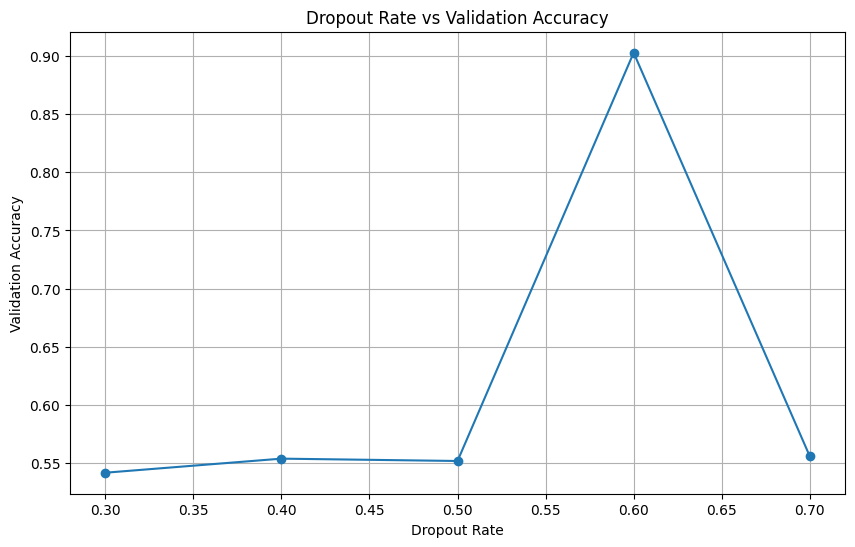

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import regularizers
from keras_tuner import HyperModel, GridSearch
import matplotlib.pyplot as plt

# Custom F1 Score Metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        return 2 * (precision_result * recall_result) / (precision_result + recall_result + tf.keras.backend.epsilon())


# HyperModel for Keras Tuner
class BoatDetectionHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(32, (7,7), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.015), input_shape=(80,80,1)))
        model.add(BatchNormalization())

        model.add(Conv2D(64, (5,5), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.015)))
        model.add(Dropout(hp.Float('dropout_1', 0.3, 0.8, step=0.1)))  # Tunable dropout 1
        model.add(BatchNormalization())
        model.add(MaxPool2D((2,2), strides=2, padding='same'))

        model.add(Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.02)))
        model.add(Dropout(0.7))  # Fixed dropout 2
        model.add(BatchNormalization())
        model.add(MaxPool2D((2,2), strides=2, padding='same'))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
        model.add(Dropout(0.8))  # Fixed dropout 3
        model.add(Dense(2, activation='softmax'))

        model.compile(optimizer=AdamW(learning_rate=0.001,
                                       weight_decay=2e-5,
                                       clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), F1Score()])
        return model


# Initialize HyperModel
hypermodel = BoatDetectionHyperModel()

# Define Tuner
tuner = GridSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='/content/drive/MyDrive/hyperparam_tuning5',
    project_name='dropout_tuning'
)

# Load data using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    shear_range = 0.2,
    channel_shift_range = 20.0,
    brightness_range = [0.8, 1.2],
    rescale=1./255
)
test_datagen = ImageDataGenerator(rescale=1./255)

image_directory = '/content/drive/MyDrive/train/'

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=(80, 80),
    batch_size=100,
    class_mode='categorical',
    color_mode='grayscale'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=(80, 80),
    batch_size=100,
    class_mode='categorical',
    color_mode='grayscale'
)

# Perform Hyperparameter Search
tuner.search(train_generator, validation_data=val_generator, callbacks=[learning_rate_callback], epochs=15)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best Dropout Rate: {best_hps.get('dropout_1')}")

# Visualize Results
best_trials = tuner.oracle.get_best_trials(num_trials=10)
dropouts = []
accuracies = []

for trial in best_trials:
    dropouts.append(trial.hyperparameters.get('dropout_1'))
    accuracies.append(trial.metrics.get_last_value('val_accuracy'))

# Sort the dropouts and accuracies based on dropout values
sorted_dropouts, sorted_accuracies = zip(*sorted(zip(dropouts, accuracies)))

# Plotting the sorted values
plt.figure(figsize=(10, 6))
plt.plot(sorted_dropouts, sorted_accuracies, marker='o')
plt.xlabel('Dropout Rate')
plt.ylabel('Validation Accuracy')
plt.title('Dropout Rate vs Validation Accuracy')
plt.grid(True)
plt.show()


Dropout 2 tuning

Trial 5 Complete [00h 49m 30s]
val_accuracy: 0.5535353422164917

Best val_accuracy So Far: 0.5535353422164917
Total elapsed time: 04h 10m 11s
Best Dropout Rate: 0.6000000000000001


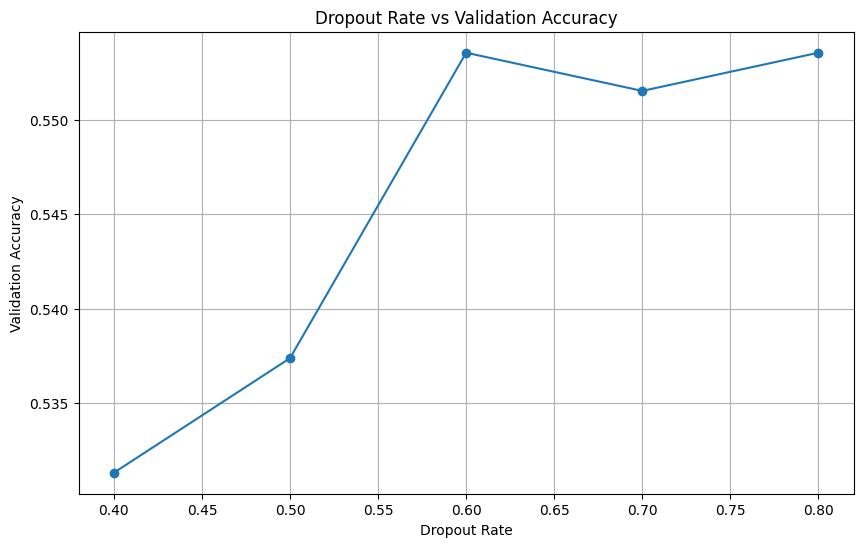

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import regularizers
from keras_tuner import HyperModel, GridSearch
import matplotlib.pyplot as plt

# Custom F1 Score Metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        return 2 * (precision_result * recall_result) / (precision_result + recall_result + tf.keras.backend.epsilon())


# HyperModel for Keras Tuner
class BoatDetectionHyperModel2(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(32, (7,7), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.015), input_shape=(80,80,1)))
        model.add(BatchNormalization())

        model.add(Conv2D(64, (5,5), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.015)))
        model.add(Dropout(0.6)) # Tunable dropout 1
        model.add(BatchNormalization())
        model.add(MaxPool2D((2,2), strides=2, padding='same'))

        model.add(Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.02)))
        model.add(Dropout(hp.Float('dropout_2', 0.4, 0.9, step=0.1))) # Fixed dropout 2
        model.add(BatchNormalization())
        model.add(MaxPool2D((2,2), strides=2, padding='same'))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
        model.add(Dropout(0.8))  # Fixed dropout 3
        model.add(Dense(2, activation='softmax'))

        model.compile(optimizer=AdamW(learning_rate=0.001,
                                       weight_decay=2e-5,
                                       clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), F1Score()])
        return model


# Initialize HyperModel
hypermodel = BoatDetectionHyperModel2()

# Define Tuner
tuner = GridSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='/content/drive/MyDrive/hyperparam_tuning5',
    project_name='dropout_tuning211'
)

# Load data using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    shear_range = 0.2,
    channel_shift_range = 20.0,
    brightness_range = [0.8, 1.2],
    rescale=1./255
)
test_datagen = ImageDataGenerator(rescale=1./255)

image_directory = '/content/drive/MyDrive/train/'

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=(80, 80),
    batch_size=100,
    class_mode='categorical',
    color_mode='grayscale'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=(80, 80),
    batch_size=100,
    class_mode='categorical',
    color_mode='grayscale'
)

# Perform Hyperparameter Search
tuner.search(train_generator, validation_data=val_generator, callbacks=[learning_rate_callback], epochs=15)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best Dropout Rate: {best_hps.get('dropout_2')}")

# Visualize Results
best_trials = tuner.oracle.get_best_trials(num_trials=10)
dropouts = []
accuracies = []

for trial in best_trials:
    dropouts.append(trial.hyperparameters.get('dropout_2'))
    accuracies.append(trial.metrics.get_last_value('val_accuracy'))

# Sort the dropouts and accuracies based on dropout values
sorted_dropouts, sorted_accuracies = zip(*sorted(zip(dropouts, accuracies)))

# Plotting the sorted values
plt.figure(figsize=(10, 6))
plt.plot(sorted_dropouts, sorted_accuracies, marker='o')
plt.xlabel('Dropout Rate')
plt.ylabel('Validation Accuracy')
plt.title('Dropout Rate vs Validation Accuracy')
plt.grid(True)
plt.show()


Dropout 3 tuning


Reloading Tuner from /content/drive/MyDrive/hyperparam_tuning5/dropout_tuning31/tuner0.json
Found 1980 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.
Best Dropout Rate: 0.6


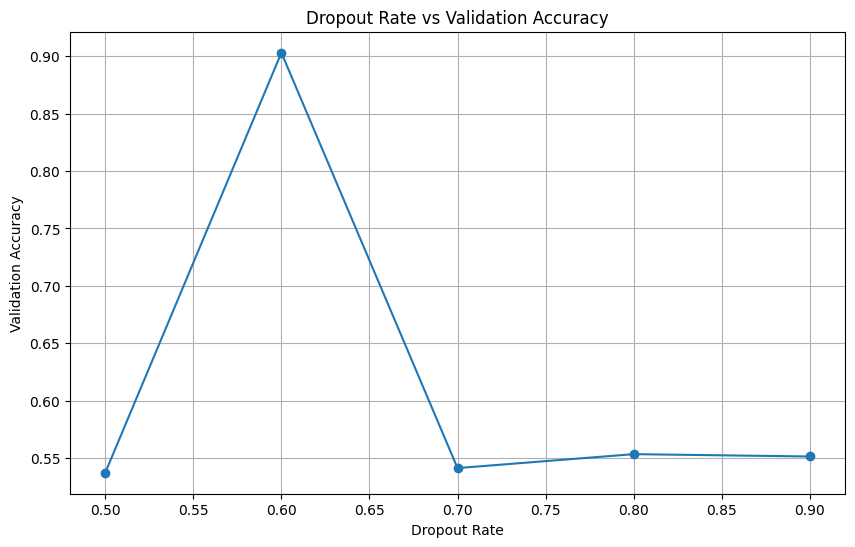

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import regularizers
from keras_tuner import HyperModel, GridSearch
import matplotlib.pyplot as plt

# Custom F1 Score Metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        return 2 * (precision_result * recall_result) / (precision_result + recall_result + tf.keras.backend.epsilon())


# HyperModel for Keras Tuner
class BoatDetectionHyperModel3(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(32, (7,7), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.015), input_shape=(80,80,1)))
        model.add(BatchNormalization())

        model.add(Conv2D(64, (5,5), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.015)))
        model.add(Dropout(0.6)) # Tunable dropout 1
        model.add(BatchNormalization())
        model.add(MaxPool2D((2,2), strides=2, padding='same'))

        model.add(Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu',
                         kernel_regularizer=regularizers.l2(0.02)))
        model.add(Dropout(0.8)) # Fixed dropout 2
        model.add(BatchNormalization())
        model.add(MaxPool2D((2,2), strides=2, padding='same'))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
        model.add(Dropout(hp.Float('dropout_3', 0.5, 1, step=0.1)))  # Fixed dropout 3
        model.add(Dense(2, activation='softmax'))

        model.compile(optimizer=AdamW(learning_rate=0.001,
                                       weight_decay=2e-5,
                                       clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), F1Score()])
        return model


# Initialize HyperModel
hypermodel = BoatDetectionHyperModel3()

# Define Tuner
tuner = GridSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='/content/drive/MyDrive/hyperparam_tuning5',
    project_name='dropout_tuning31'
)

# Load data using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    shear_range = 0.2,
    channel_shift_range = 20.0,
    brightness_range = [0.8, 1.2],
    rescale=1./255
)
test_datagen = ImageDataGenerator(rescale=1./255)

image_directory = '/content/drive/MyDrive/train/'

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=(80, 80),
    batch_size=100,
    class_mode='categorical',
    color_mode='grayscale'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=(80, 80),
    batch_size=100,
    class_mode='categorical',
    color_mode='grayscale'
)

# Perform Hyperparameter Search
tuner.search(train_generator, validation_data=val_generator, callbacks=[learning_rate_callback], epochs=15)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best Dropout Rate: {best_hps.get('dropout_3')}")

# Visualize Results
best_trials = tuner.oracle.get_best_trials(num_trials=10)
dropouts = []
accuracies = []

for trial in best_trials:
    dropouts.append(trial.hyperparameters.get('dropout_3'))
    accuracies.append(trial.metrics.get_last_value('val_accuracy'))

# Sort the dropouts and accuracies based on dropout values
sorted_dropouts, sorted_accuracies = zip(*sorted(zip(dropouts, accuracies)))

# Plotting the sorted values
plt.figure(figsize=(10, 6))
plt.plot(sorted_dropouts, sorted_accuracies, marker='o')
plt.xlabel('Dropout Rate')
plt.ylabel('Validation Accuracy')
plt.title('Dropout Rate vs Validation Accuracy')
plt.grid(True)
plt.show()


# DEBUG

Checking directory connection

In [ ]:
import os

# Specify the directory where your images are stored
directory = '/content/drive/MyDrive/train/no_ships'

# List all files in the directory and filter by image extensions (e.g., .jpg, .png)
image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Get the number of image files
num_images = len(image_files)

print(f"Number of images in directory: {num_images}")

Number of images in directory: 1246


Deletion of excess images

In [ ]:
import os
import random

# Path to the 'no_ships' directory
no_ships_dir = "/content/drive/MyDrive/train/no

# List all files in the directory
no_ships_images = os.listdir(no_ships_dir)

# Randomly select 700 files to delete
files_to_delete = random.sample(no_ships_images, 120)

# Delete the selected files
for file in files_to_delete:
    file_path = os.path.join(no_ships_dir, file)
    os.remove(file_path)
    print(f"Deleted: {file}")

Deleted: 2024-09-18-00_00_2024-09-18-23_59_Sentinel-2_L2A_SWIR_1280_160.png
Deleted: 2024-09-06-00_00_2024-09-06-23_59_Sentinel-2_L2A_SWIR_2400_640.png
Deleted: 2024-09-08-00_00_2024-09-08-23_59_Sentinel-2_L2A_SWIR_1440_640.png
Deleted: 2024-09-06-00_00_2024-09-06-23_59_Sentinel-2_L2A_SWIR_560_1280.png
Deleted: 2024-09-08-00_00_2024-09-08-23_59_Sentinel-2_L2A_SWIR_1280_400.png
Deleted: 2024-09-18-00_00_2024-09-18-23_59_Sentinel-2_L2A_SWIR_1040_960.png
Deleted: 2024-09-08-00_00_2024-09-08-23_59_Sentinel-2_L2A_SWIR_2080_560.png
Deleted: 2024-09-08-00_00_2024-09-08-23_59_Sentinel-2_L2A_SWIR_1040_240.png
Deleted: 2024-09-21-00_00_2024-09-21-23_59_Sentinel-2_L2A_SWIR (2)_400_160.png
Deleted: 2024-09-06-00_00_2024-09-06-23_59_Sentinel-2_L2A_SWIR_2240_400.png
Deleted: 2024-09-08-00_00_2024-09-08-23_59_Sentinel-2_L2A_SWIR_2080_1040.png
Deleted: 2024-09-06-00_00_2024-09-06-23_59_Sentinel-2_L2A_SWIR_1600_1280.png
Deleted: 2024-09-18-00_00_2024-09-18-23_59_Sentinel-2_L2A_SWIR_480_880.png
Deleted:

In [ ]:
import shutil
shutil.copytree("/content/drive/MyDrive/train/no_ships", "/content/drive/MyDrive/train/ns1")

'/content/drive/MyDrive/train/no_ships1'

Check raw predictions

In [ ]:
# Predicting on test data and printing raw prediction values
predictions = Boat_Detection.predict(val_generator)

# Print first 10 predictions for inspection
print("First 10 raw predictions:", predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 692ms/step
First 10 raw predictions: [[0.2455908 ]
 [0.2451937 ]
 [0.982029  ]
 [0.9995888 ]
 [0.2451937 ]
 [0.2451937 ]
 [0.24908118]
 [0.97409046]
 [0.2451937 ]
 [0.2451937 ]]


Check missing images

In [ ]:
import os
import pandas as pd

# Load CSV files
train_df = pd.read_csv('/content/train_labels.csv')
test_df = pd.read_csv('/content/test_labels.csv')

# Check for missing files in 'ships' and 'no_ships'
ship_folder = '/content/drive/MyDrive/train/ships'
no_ship_folder = '/content/drive/MyDrive/train/no_ships'

# List all files in the directories
ship_images = os.listdir(ship_folder)
no_ship_images = os.listdir(no_ship_folder)

# Check if all ship images are in the CSV
for img in train_df['filename']:
    if img not in ship_images and img not in no_ship_images:
        print(f"Missing image in CSV: {img}")

# Repeat for test data if needed

Missing image in CSV: no_ships/2024-09-21-00_00_2024-09-21-23_59_Sentinel-2_L2A_SWIR (2)_880_720.png
Missing image in CSV: no_ships/2024-09-06-00_00_2024-09-06-23_59_Sentinel-2_L2A_SWIR_1600_320.png
Missing image in CSV: no_ships/2024-09-18-00_00_2024-09-18-23_59_Sentinel-2_L2A_SWIR_960_320.png
Missing image in CSV: ships/aug_11_3232436.png
Missing image in CSV: no_ships/2024-09-06-00_00_2024-09-06-23_59_Sentinel-2_L2A_SWIR_80_720.png
Missing image in CSV: ships/aug_11_8186503.png
Missing image in CSV: ships/aug_9_2821531.png
Missing image in CSV: no_ships/2024-09-18-00_00_2024-09-18-23_59_Sentinel-2_L2A_SWIR_1120_80.png
Missing image in CSV: no_ships/2024-09-06-00_00_2024-09-06-23_59_Sentinel-2_L2A_SWIR_1840_1280.png
Missing image in CSV: no_ships/2024-09-06-00_00_2024-09-06-23_59_Sentinel-2_L2A_SWIR_320_0.png
Missing image in CSV: ships/aug_20_6705002.png
Missing image in CSV: ships/aug_13_6546109.png
Missing image in CSV: no_ships/2024-09-08-00_00_2024-09-08-23_59_Sentinel-2_L2A_SWI